## Load Packages

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm 
import pylab as py 
import seaborn as sns
import matplotlib.pyplot as plt



## Load Data

In [2]:
book = pd.read_csv('hotel_bookings.csv')
print("Shape of Bookings: {}".format(book.shape))

FileNotFoundError: [Errno 2] No such file or directory: 'hotel_bookings.csv'

In [ ]:
book.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
book.isnull().mean()

hotel                             0.000000
is_canceled                       0.000000
lead_time                         0.000000
arrival_date_year                 0.000000
arrival_date_month                0.000000
arrival_date_week_number          0.000000
arrival_date_day_of_month         0.000000
stays_in_weekend_nights           0.000000
stays_in_week_nights              0.000000
adults                            0.000000
children                          0.000034
babies                            0.000000
meal                              0.000000
country                           0.004087
market_segment                    0.000000
distribution_channel              0.000000
is_repeated_guest                 0.000000
previous_cancellations            0.000000
previous_bookings_not_canceled    0.000000
reserved_room_type                0.000000
assigned_room_type                0.000000
booking_changes                   0.000000
deposit_type                      0.000000
agent      

## T-Test

With the t-test we want to measure if the price is different for customers canceling their booking and the ones coming. 
Such the Hypotheses for the test are: 
H0: Average Price Cancellation = Average Price No Cancellation
H1: Average Price Cancellation != Average Price No Cancellation

For continuing with the calculations we prepare the data first. 

In [ ]:
price_cancel = book[book['is_canceled']==1]['adr']
price_not_cancel = book[book['is_canceled']==0]['adr']

In [ ]:
print("Shape of vector price canceled: {}".format(price_cancel.shape))
print("Shape of vector price not canceled: {}".format(price_not_cancel.shape))

Shape of vector price canceled: (44224,)
Shape of vector price not canceled: (75166,)


### Control of Hyptoheses
Before applying the t-test the following hypotheses should be controlled for being aware of possible problems. 

#### Normality 
We apply the Q-Q Plot for controlling for normal distribution

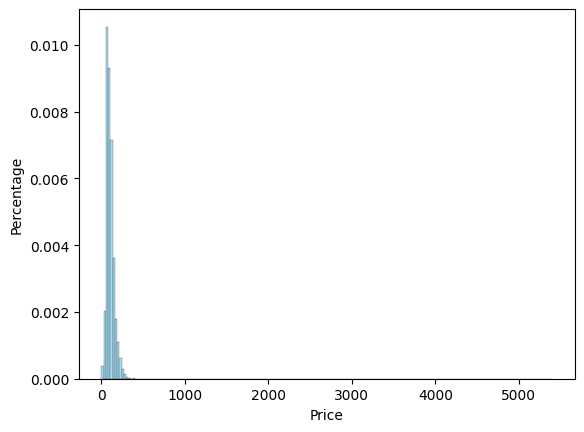

In [ ]:
# Create histogram using seaborn
sns.histplot(price_cancel, kde=False,stat='density', color='skyblue',bins=200)

# Set x and y axis labels
plt.xlabel('Price')
plt.ylabel('Percentage')

# Show the plot
plt.show()

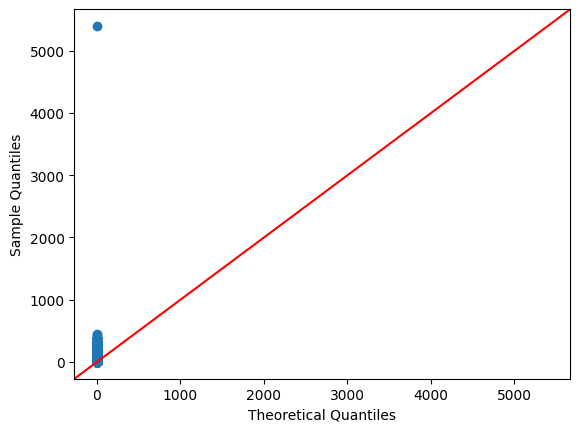

In [ ]:
sm.qqplot(price_cancel, line='45')
py.show()

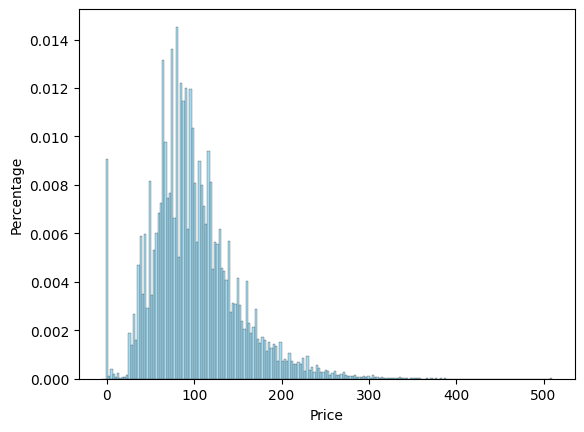

In [ ]:
# Create histogram using seaborn
sns.histplot(price_not_cancel, kde=False,stat='density', color='skyblue',bins=200)

# Set x and y axis labels
plt.xlabel('Price')
plt.ylabel('Percentage')

# Show the plot
plt.show()

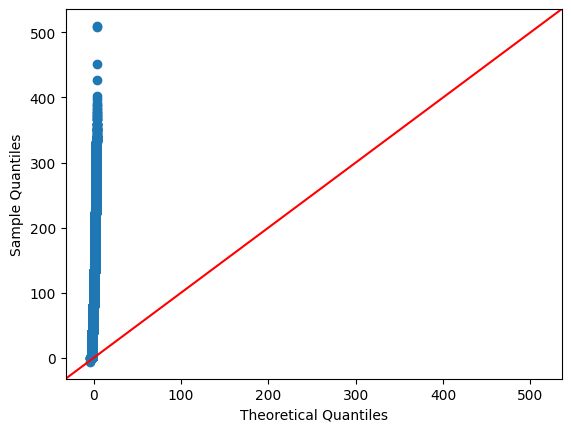

In [ ]:
sm.qqplot(price_not_cancel, line='45')
py.show()

From the plots we would expect a difference in price. What is to maintain in head, that the data are not normal distributed at all. 

#### Homoscedasticity
We control for Homoscedasticity with the Levene's Test. ¨
The Hypotheses are: 
H0: The variance of the price of the canceled reservations = variance of the price of the not canceled bookings
H1: The variance of the price of the canceled bookings != variance of the price of the not canceled bookings


In [ ]:
res = stats.levene(price_cancel, price_not_cancel)

In [ ]:
res

LeveneResult(statistic=105.48243609003654, pvalue=9.804145603713699e-25)

The Levene's test state us with a p-value with smaller than 0.01 that we need to reject the null hypothesis. This means that we can assume a difference in variance. 

### Application of Test
Even if the normal distribution of the data is not fulfilled, we will now perform the T-test. However, as a control, we will also apply the Wilcoxon test. 

In [ ]:
stats.ttest_ind(price_cancel,price_not_cancel, equal_var=False, alternative='two-sided')

TtestResult(statistic=16.171403781219496, pvalue=9.760125742596113e-59, df=87832.03639783298)

The t-test states, that the the null hypothesis will be rejected. Hence, there is the sign for a difference. 

## Wilcoxon Test - Rank Sums
The null hypothesis that two sets of measurements are drawn from the same distribution. 
The alternative hypothesiss is that values in one sample are more likely to be larger than the values in the other sample.
two-sided: one of the distributions (underlying x or y) is stochastically greater than the other. 

In [ ]:
stats.ranksums(price_cancel,price_not_cancel,alternative='two-sided')

RanksumsResult(statistic=17.57821656446254, pvalue=3.617778971574785e-69)

The Wilcoxon Tests state that we reject the null hypothesis. 

## Chi-Square test

Before we can apply, we first build a contingency table. 

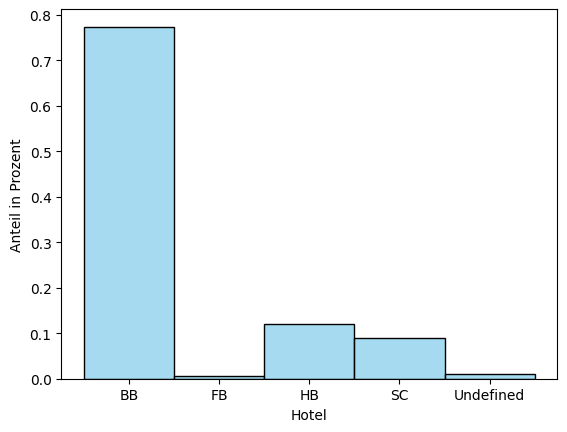

In [ ]:
# Create histogram using seaborn
sns.histplot(book['meal'], kde=False, stat='density', color='skyblue')

# Set x and y axis labels
plt.xlabel('Hotel')
plt.ylabel('Anteil in Prozent')

# Show the plot
plt.show()

In [ ]:
book.groupby(['meal'])['meal'].count()

meal
BB           92310
FB             798
HB           14463
SC           10650
Undefined     1169
Name: meal, dtype: int64

In [ ]:
meal = book['meal']
cancel = book['is_canceled']
tab = pd.crosstab(meal,cancel)
tab

is_canceled,0,1
meal,,
BB,57800,34510
FB,320,478
HB,9479,4984
SC,6684,3966
Undefined,883,286


In [ ]:
res = stats.chi2_contingency(tab)
res.pvalue

1.3212351959124216e-64

In [ ]:
res

Chi2ContingencyResult(statistic=304.23617668200444, pvalue=1.3212351959124216e-64, dof=4, expected_freq=array([[58116.87293743, 34193.12706257],
       [  502.40780635,   295.59219365],
       [ 9105.66930229,  5357.33069771],
       [ 6705.06658849,  3944.93341151],
       [  735.98336544,   433.01663456]]))

In [ ]:
res.expected_freq

array([[58116.87293743, 34193.12706257],
       [  502.40780635,   295.59219365],
       [ 9105.66930229,  5357.33069771],
       [ 6705.06658849,  3944.93341151],
       [  735.98336544,   433.01663456]])

## ANOVA

In [ ]:
price_BB = book[book['meal']=='BB']['adr']
price_FB = book[book['meal']=='FB']['adr']
price_HB= book[book['meal']=='HB']['adr']
price_SC= book[book['meal']=='SC']['adr']
price_U = book[book['meal']=='Undefined']['adr']
print("Shape of Price for BB: {}".format(price_BB.shape))
print("Shape of Price for FB: {}".format(price_FB.shape))
print("Shape of Price for HB: {}".format(price_HB.shape))
print("Shape of Price for SC: {}".format(price_SC.shape))
print("Shape of Price for U: {}".format(price_U.shape))

Shape of Price for BB: (92310,)
Shape of Price for FB: (798,)
Shape of Price for HB: (14463,)
Shape of Price for SC: (10650,)
Shape of Price for U: (1169,)


In [ ]:
stats.f_oneway(price_BB,price_FB,price_HB,price_SC,price_U)

F_onewayResult(statistic=575.5295698298745, pvalue=0.0)